# Problem 1

In [78]:
import numpy as np
from scipy.linalg import svd
from scipy.linalg import diagsvd
from scipy.linalg import pinv
from scipy.linalg import inv



m = 5 ; n = 3

a = np.array([[1,-1,4],
             [2,7,-1],
             [1,4, 2],
             [3,-1,4],
             [1,2,3]])

b = np.array([4,8,7,6,6])
b = b.reshape(5,1)


U, sigma, VT = svd(a)
Sigma = diagsvd(sigma, m, n)

PseudoA = (VT).T @ pinv(Sigma) @ U.T 


x = PseudoA @ b
x1 = pinv(a) @ b
y = x - x1
print("Solution Vector x =")
print(x)

Solution Vector x =
[[1.]
 [1.]
 [1.]]


# Problem 2

Because there are more rows than columns the rank of a 5 by 3 matrix cannot be 5. The rank of the matrix is 3 as that is the maximum number of linearly independent rows that exist. 

# Problem 3

In [83]:
from scipy.linalg import qr
from scipy.linalg import solve



Q, R = qr(A, mode='economic')


x = solve(R, Q.T @ b)  

print(" ")
print("A solution")
print(x)
print(" ")

 
A solution
[[1.]
 [1.]
 [1.]]
 


# Problem 4

In [84]:
import numpy as np
from numpy.linalg import eig

ATA = A.T @ A 

eig_values, eig_vectors = eig(ATA)

print("ATA eig_values")
print(eig_values)
print(" ")
print("ATA eig_vectors")
print(eig_vectors)

ATA eig_values
[ 3.49762137 53.54106867 75.96130996]
 
ATA eig_vectors
[[ 0.88931707 -0.34385442 -0.30146192]
 [-0.2167587   0.26349695 -0.93999203]
 [-0.40265471 -0.90129545 -0.1597989 ]]


ATA are positive definite. We know that the eigenvalues of AAT are non-negative and real numbers.

# Problem 5

In [85]:
import numpy as np 
from scipy.linalg import solve
from scipy.linalg import lu



ATA = A.T @ A


ATb = A.T @ b



P, L, U = lu(ATA)


#solve ATAx = ATb
y = solve(L, P.T @ ATb)
x = solve(U, y)

print("ATA solution")
print(x)

ATA solution
[[1.]
 [1.]
 [1.]]


# Problem 6

In [86]:
import numpy as np 
from scipy.linalg import ldl
from scipy.linalg import solve
from scipy.linalg import diagsvd


ATA = A.T @ A 

ATb = A.T @ b


L, D, p = ldl(ATA)


 
z = solve(L , ATb)
y = solve(D, z)
x = solve(L.T, y)


print("ATA solution")
print(x)

ATA solution
[[1.]
 [1.]
 [1.]]


# Problem 7

In [87]:
import numpy as np 
from scipy.linalg import solve
from scipy.linalg import cholesky


ATA = A.T @ A

ATb = A.T @ b



R = cholesky(ATA)



w = solve(R.T, ATb)
x = solve(R, w)


print("ATA solution")
print(x)

ATA solution
[[1.]
 [1.]
 [1.]]


# Problem 8

 
The Minimum Occurs at (x, y) = (x0, x1) =  [3. 2.]
 
And The Minimum Value =  1.0
 
Other Statistics:
     fun: 1.0
     jac: array([4.96402825e-07, 3.99597866e-06])
 message: 'Optimization terminated successfully.'
    nfev: 10
    nhev: 8
     nit: 8
    njev: 10
  status: 0
 success: True
       x: array([3., 2.])


<ipython-input-89-21bc846ee27f>:54: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


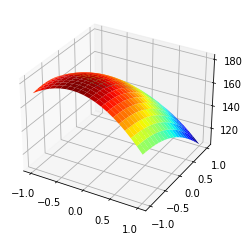

In [89]:
'''
Function Optimization Using ==> scipy.opimize
The Following Minimization Algoriths Are Implemented:
    minimize(method=’Nelder-Mead’)  <=
    minimize(method=’Powell’)       <=
    minimize(method=’CG’)           <=
    minimize(method=’BFGS’)         <=
    minimize(method=’Newton-CG’)    <= Requires The Gradient & Hessian
    minimize(method=’L-BFGS-B’)     <=
    minimize(method=’TNC’)          <= 
    minimize(method=’COBYLA’)       <= 
    minimize(method=’SLSQP’)        <= 
    minimize(method=’trust-constr’) <=
    minimize(method=’dogleg’)       <= Requires The Gradient & Hessian
    minimize(method=’trust-ncg’)    <= Requires The Gradient & Hessian
    minimize(method=’trust-krylov’) <= Requires The Gradient & Hessian
    minimize(method=’trust-exact’)  <= Requires The Gradient & Hessian 
'''

from numpy import array
from scipy.optimize import minimize


def f(x): 
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 - 7)**2 + 1

def gradient(x):
    return array([2*(2*x[0]*(x[0]**2 + x[1] - 11) + x[0] + x[1]**2 - 7), 
                     2*(x[0]**2 + 2*x[1]*(x[0] + x[1]**2 - 7) + x[1] - 11)])

def hessian(x):
    return array([[12*(x[0]**2) + 4*(x[1]) - 42, 4*(x[0] + x[1])], 
                  [4*(x[0] + x[1]), 4*(x[0]) + 12*(x[1]**2) - 26]])

x0 = array([1,1])
result = minimize(f, x0, method = 'Newton-CG',
                  jac = gradient, hess = hessian, tol=1.e-7)

print(" ")
print("The Minimum Occurs at (x, y) = (x0, x1) = ", result.x)
print(" ")
print("And The Minimum Value = ", f(result.x))
print(" ")
print("Other Statistics:" ) 
print( result )          
#
# Plot Function: 
#      
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d') 

x = linspace( -1, 1, 20)
y = linspace( -1, 1, 20)
 
x, y = meshgrid(x,y)
z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2 + 1

surf = ax.plot_surface(x, y, z, 
       rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.show()

Gradient = [2(2x(x^2 + y - 11) + x + y^2 - 7),2(x^2 + 2y(x + y^2 - 7) + y -11)]

Hessian = (12x^2 + 4y - 42,4(x + y),
           4(x + y),4x + 12y^2 - 26)

# Problem 9

 
The Minimum Occurs at (x, y) = (x0, x1) =  [3. 2.]
 
And The Minimum Value =  1.0
 
Other Statistics:
     fun: 1.0
     jac: array([4.96402825e-07, 3.99597866e-06])
 message: 'Optimization terminated successfully.'
    nfev: 10
    nhev: 8
     nit: 8
    njev: 10
  status: 0
 success: True
       x: array([3., 2.])


<ipython-input-47-21bc846ee27f>:54: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


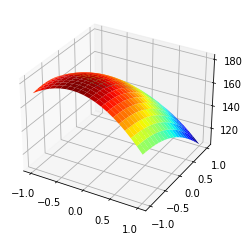

In [47]:
'''
Function Optimization Using ==> scipy.opimize
The Following Minimization Algoriths Are Implemented:
    minimize(method=’Nelder-Mead’)  <=
    minimize(method=’Powell’)       <=
    minimize(method=’CG’)           <=
    minimize(method=’BFGS’)         <=
    minimize(method=’Newton-CG’)    <= Requires The Gradient & Hessian
    minimize(method=’L-BFGS-B’)     <=
    minimize(method=’TNC’)          <= 
    minimize(method=’COBYLA’)       <= 
    minimize(method=’SLSQP’)        <= 
    minimize(method=’trust-constr’) <=
    minimize(method=’dogleg’)       <= Requires The Gradient & Hessian
    minimize(method=’trust-ncg’)    <= Requires The Gradient & Hessian
    minimize(method=’trust-krylov’) <= Requires The Gradient & Hessian
    minimize(method=’trust-exact’)  <= Requires The Gradient & Hessian 
'''

from numpy import array
from scipy.optimize import minimize


def f(x): 
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 - 7)**2 + 1

def gradient(x):
    return array([2*(2*x[0]*(x[0]**2 + x[1] - 11) + x[0] + x[1]**2 - 7), 
                     2*(x[0]**2 + 2*x[1]*(x[0] + x[1]**2 - 7) + x[1] - 11)])

def hessian(x):
    return array([[12*(x[0]**2) + 4*(x[1]) - 42, 4*(x[0] + x[1])], 
                  [4*(x[0] + x[1]), 4*(x[0]) + 12*(x[1]**2) - 26]])

x0 = array([1,1])
result = minimize(f, x0, method = 'Newton-CG',
                  jac = gradient, hess = hessian, tol=1.e-7)

print(" ")
print("The Minimum Occurs at (x, y) = (x0, x1) = ", result.x)
print(" ")
print("And The Minimum Value = ", f(result.x))
print(" ")
print("Other Statistics:" ) 
print( result )          
#
# Plot Function: 
#      
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d') 

x = linspace( -1, 1, 20)
y = linspace( -1, 1, 20)
 
x, y = meshgrid(x,y)
z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2 + 1

surf = ax.plot_surface(x, y, z, 
       rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.show()

# Problem 10

 
The Minimum Occurs at (x, y) = (x0, x1) =  [3. 2.]
 
And The Minimum Value =  1.0
 
Other Statistics:
     fun: 1.0
    hess: array([[74., 20.],
       [20., 34.]])
     jac: array([2.22044605e-13, 1.78701498e-12])
 message: 'Optimization terminated successfully.'
    nfev: 25
    nhev: 25
     nit: 24
    njev: 25
  status: 0
 success: True
       x: array([3., 2.])


<ipython-input-58-f1e64079ede7>:54: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


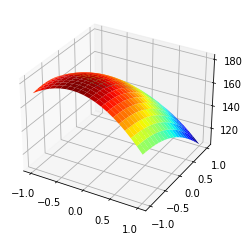

In [58]:
'''
Function Optimization Using ==> scipy.opimize
The Following Minimization Algoriths Are Implemented:
    minimize(method=’Nelder-Mead’)  <=
    minimize(method=’Powell’)       <=
    minimize(method=’CG’)           <=
    minimize(method=’BFGS’)         <=
    minimize(method=’Newton-CG’)    <= Requires The Gradient & Hessian
    minimize(method=’L-BFGS-B’)     <=
    minimize(method=’TNC’)          <= 
    minimize(method=’COBYLA’)       <= 
    minimize(method=’SLSQP’)        <= 
    minimize(method=’trust-constr’) <=
    minimize(method=’dogleg’)       <= Requires The Gradient & Hessian
    minimize(method=’trust-ncg’)    <= Requires The Gradient & Hessian
    minimize(method=’trust-krylov’) <= Requires The Gradient & Hessian
    minimize(method=’trust-exact’)  <= Requires The Gradient & Hessian 
'''

from numpy import array
from scipy.optimize import minimize


def f(x): 
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 - 7)**2 + 1

def gradient(x):
    return array([2*(2*x[0]*(x[0]**2 + x[1] - 11) + x[0] + x[1]**2 - 7), 
                     2*(x[0]**2 + 2*x[1]*(x[0] + x[1]**2 - 7) + x[1] - 11)])

def hessian(x):
    return array([[12*(x[0]**2) + 4*(x[1]) - 42, 4*(x[0] + x[1])], 
                  [4*(x[0] + x[1]), 4*(x[0]) + 12*(x[1]**2) - 26]])

x0 = array([400,400])
result = minimize(f, x0, method = 'trust-exact',
                  jac = gradient, hess = hessian, tol=1.e-7)

print(" ")
print("The Minimum Occurs at (x, y) = (x0, x1) = ", result.x)
print(" ")
print("And The Minimum Value = ", f(result.x))
print(" ")
print("Other Statistics:" ) 
print( result )          
#
# Plot Function: 
#      
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d') 

x = linspace( -1, 1, 20)
y = linspace( -1, 1, 20)
 
x, y = meshgrid(x,y)
z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2 + 1

surf = ax.plot_surface(x, y, z, 
       rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.show()

Begining at point (400,400) we use the trust-exact method to get a minimum value of 1 that occurs on point(3, 2). This method did converge. It required 24 iterations and 25 function evaluations to get to the minimum value.

Based on the hessian, all the minima for the function are [74, 20, 
                                 20,34]. 

